In [1]:
# import libraries and packages

import os
import numpy as np
from assaytools import parser
import string
from glob import glob

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set(style='white')
sns.set_context('talk')

In [15]:
#### load data files

# files from 4ti-0234 plate (UV plate)

xml_files_4ti0234 = ['infinite_results/4ti-0234_plate/2017-11-20 15-48-06_plate_1.xml',
            'infinite_results/4ti-0234_plate/2017-11-20 16-17-59_plate_1.xml',
            'infinite_results/4ti-0234_plate/2017-11-20 16-41-35_plate_1.xml',
            'infinite_results/4ti-0234_plate/2017-11-20 16-59-09_plate_1.xml',
            'infinite_results/4ti-0234_plate/2017-11-20 17-19-31_plate_1.xml',
            'infinite_results/4ti-0234_plate/2017-11-20 17-37-37_plate_1.xml',
            'infinite_results/4ti-0234_plate/2017-11-20 17-58-04_plate_1.xml',
            'infinite_results/4ti-0234_plate/2017-11-20 18-16-02_plate_1.xml',
            'infinite_results/4ti-0234_plate/2017-11-20 18-35-42_plate_1.xml',
            'infinite_results/4ti-0234_plate/2017-11-20 18-54-33_plate_1.xml',
            'infinite_results/4ti-0234_plate/2017-11-20 19-12-49_plate_1.xml',
            'infinite_results/4ti-0234_plate/2017-11-20 19-31-32_plate_1.xml']

# files from Corning 3651 (NB plate)

xml_files_Corning_3651 = ['infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GK_conc_0_20190307_111234.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GK_conc_1_20190307_112351.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_2_20190307_113345.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_3_20190307_114336.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_4_20190307_115329.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_5_20190307_120322.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_6_20190307_121315.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_7_20190307_122657.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_8_20190307_123649.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_9_20190307_124642.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_10_20190307_125635.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_11_20190307_130625.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_12_20190307_131618.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_13_20190307_132611.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_14_20190307_133612.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_15_20190307_134607.xml',
             'infinite_results/Corning_3651_plate/p38_Abl_WT_GK_Src_WT_GKconc_16_20190307_135607.xml']

In [16]:
### create ligand concentration arrays 

# 4ti-0234 experiment had 12 concentration points

ligand_conc_12 = [ 0.00000000e+00, 8.00000000e-09, 1.74937932e-08, 3.82541000e-08,
                           8.36511642e-08, 1.82922021e-07, 4.00000000e-07, 8.74689659e-07,
                           1.91270500e-06, 4.18255821e-06, 9.14610104e-06, 2.00000000e-05 ]

# Corning 3651 experiment had 17 concentration points

ligand_conc_17 = [  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05]

In [17]:
def inputs(xml_files, prot_wells, lig3, lig4, buff_wells, section, ligand_conc, Pstated, i):
    return({
    'single_well'   :  True,
    'xml_files'     :  xml_files,
    'file_set'      :  {'dialyzed_p38_1': xml_files},
    'protein_wells'  :  {'dialyzed_p38_1': prot_wells},
    'ligand_order'  :  ['Bosutinib','Bosutinib Isomer',lig3,lig4],
    'buffer_wells'   :  {'dialyzed_p38_1': buff_wells},
    'section'       :  section,
    'wavelength'    :  '480',
    'Lstated'       :  np.array(ligand_conc, np.float64), # ligand concentration
    'Pstated'       :  Pstated * np.ones([i],np.float64), # protein concentration, M
    'assay_volume'  :  100e-6, # assay volume, L
    'well_area'     :  0.3969, # well area, cm^2 for 4ti-0203 [http://4ti.co.uk/files/3113/4217/2464/4ti-0201.pdf]
    })

In [18]:
#### create inputs for assaytools' parser script

# 4ti-0234

inputs_4ti0234 = inputs(xml_files=xml_files_4ti0234, prot_wells=['A1','B1','C1','D1'], 
                        lig3='Gefitinib', lig4='Erlotinib', buff_wells=['A2','B2','C2','D2'], 
                        section='280_480_TOP_100', ligand_conc=ligand_conc_12, Pstated=1.0e-6, i=12)

inputs_Corning_3651 = inputs(xml_files=xml_files_Corning_3651, prot_wells=['A11', 'C11', 'E11', 'G11'],
                             lig3='Erlotinib', lig4='Gefitinib', buff_wells=['A2', 'C2', 'E2', 'G2'], 
                             section='ex280_em480_top_gain100', ligand_conc=ligand_conc_17, Pstated=0.5e-6, i=17)

In [19]:
[complex_fluorescence_4ti0234, ligand_fluorescence_4ti0234] = parser.get_data_using_inputs(inputs_4ti0234)

print("4ti-0234 complex_fluorescence:\n", complex_fluorescence_4ti0234)
print("4ti-0234 ligand_fluorescence:\n", ligand_fluorescence_4ti0234)

[complex_fluorescence_Corning_3651, ligand_fluorescence_Corning_3651] = parser.get_data_using_inputs(inputs_Corning_3651)

print("Corning 3651 complex_fluorescence:\n", complex_fluorescence_Corning_3651)
print("Corning 3651 ligand_fluorescence:\n", ligand_fluorescence_Corning_3651)

4ti-0234 complex_fluorescence:
 {'dialyzed_p38_1-Bosutinib-A1A2': array([ 274.,  289.,  302.,  334.,  382.,  542.,  867., 1685., 2810.,
       3683., 4286., 5212.]), 'dialyzed_p38_1-Bosutinib Isomer-B1B2': array([ 325.,  256.,  264.,  271.,  282.,  366.,  571., 1133., 2155.,
       3881., 5479., 6820.]), 'dialyzed_p38_1-Gefitinib-C1C2': array([ 335.,  275.,  292.,  335.,  441.,  822., 1609., 3197., 5383.,
       7594., 7883., 7878.]), 'dialyzed_p38_1-Erlotinib-D1D2': array([  268.,   307.,   273.,   298.,   352.,   384.,   617.,   926.,
        1836.,  3188.,  7189., 15361.])}
4ti-0234 ligand_fluorescence:
 {'dialyzed_p38_1-Bosutinib-A1A2': array([ 193.,  207.,  204.,  209.,  233.,  244.,  266.,  410.,  744.,
       1295., 1973., 3124.]), 'dialyzed_p38_1-Bosutinib Isomer-B1B2': array([ 254.,  236.,  235.,  276.,  248.,  260.,  305.,  395.,  840.,
       1650., 2177., 2595.]), 'dialyzed_p38_1-Gefitinib-C1C2': array([ 243.,  191.,  203.,  203.,  216.,  273.,  292.,  348.,  490.,
        

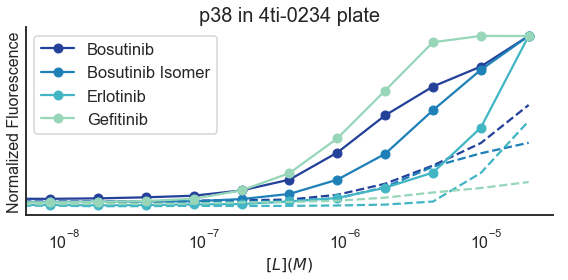

In [20]:
# Plot fluorescence binding curve for 4ti-0234 plate
cols = sns.color_palette('YlGnBu_r', 5)

fig, ax = plt.subplots(figsize=(8,4))

plt.semilogx(inputs_4ti0234['Lstated'],complex_fluorescence_4ti0234['dialyzed_p38_1-Bosutinib-A1A2']/complex_fluorescence_4ti0234['dialyzed_p38_1-Bosutinib-A1A2'].max(),marker='o',color=cols[0],label='Bosutinib')
plt.semilogx(inputs_4ti0234['Lstated'],ligand_fluorescence_4ti0234['dialyzed_p38_1-Bosutinib-A1A2']/complex_fluorescence_4ti0234['dialyzed_p38_1-Bosutinib-A1A2'].max(),linestyle='--',color=cols[0])

plt.semilogx(inputs_4ti0234['Lstated'],complex_fluorescence_4ti0234['dialyzed_p38_1-Bosutinib Isomer-B1B2']/complex_fluorescence_4ti0234['dialyzed_p38_1-Bosutinib Isomer-B1B2'].max(),marker='o',color=cols[1],label='Bosutinib Isomer')
plt.semilogx(inputs_4ti0234['Lstated'],ligand_fluorescence_4ti0234['dialyzed_p38_1-Bosutinib Isomer-B1B2']/complex_fluorescence_4ti0234['dialyzed_p38_1-Bosutinib Isomer-B1B2'].max(),linestyle='--',color=cols[1])

plt.semilogx(inputs_4ti0234['Lstated'],complex_fluorescence_4ti0234['dialyzed_p38_1-Erlotinib-D1D2']/complex_fluorescence_4ti0234['dialyzed_p38_1-Erlotinib-D1D2'].max(),marker='o',color=cols[2],label='Erlotinib')
plt.semilogx(inputs_4ti0234['Lstated'],ligand_fluorescence_4ti0234['dialyzed_p38_1-Erlotinib-D1D2']/complex_fluorescence_4ti0234['dialyzed_p38_1-Erlotinib-D1D2'].max(),linestyle='--',color=cols[2])

plt.semilogx(inputs_4ti0234['Lstated'],complex_fluorescence_4ti0234['dialyzed_p38_1-Gefitinib-C1C2']/complex_fluorescence_4ti0234['dialyzed_p38_1-Gefitinib-C1C2'].max(),marker='o',color=cols[3],label='Gefitinib')
plt.semilogx(inputs_4ti0234['Lstated'],ligand_fluorescence_4ti0234['dialyzed_p38_1-Gefitinib-C1C2']/complex_fluorescence_4ti0234['dialyzed_p38_1-Gefitinib-C1C2'].max(),linestyle='--',color=cols[3])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('p38 in 4ti-0234 plate',fontsize=20)
plt.yticks([])
plt.ylabel('Normalized Fluorescence',fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('$[L] (M)$',fontsize=16)
plt.legend(loc=2)

plt.tight_layout()

plt.savefig('p38_binding_curve_4ti-0234.png', dpi=500)
plt.savefig('p38_binding_curve_4ti-0234.pdf')


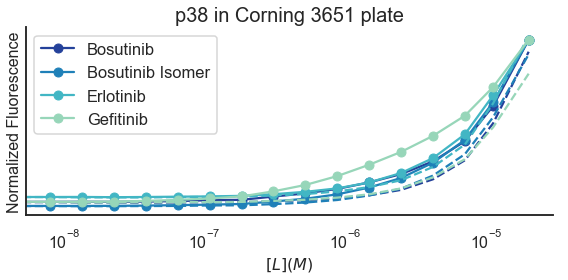

In [21]:
# Plot fluorescence binding curve for Corning 3651 plate
cols = sns.color_palette('YlGnBu_r', 5)

fig, ax = plt.subplots(figsize=(8,4))

plt.semilogx(inputs_Corning_3651['Lstated'],complex_fluorescence_Corning_3651['dialyzed_p38_1-Bosutinib-A11A2']/complex_fluorescence_Corning_3651['dialyzed_p38_1-Bosutinib-A11A2'].max(),marker='o',color=cols[0],label='Bosutinib')
plt.semilogx(inputs_Corning_3651['Lstated'],ligand_fluorescence_Corning_3651['dialyzed_p38_1-Bosutinib-A11A2']/complex_fluorescence_Corning_3651['dialyzed_p38_1-Bosutinib-A11A2'].max(),linestyle='--',color=cols[0])

plt.semilogx(inputs_Corning_3651['Lstated'],complex_fluorescence_Corning_3651['dialyzed_p38_1-Bosutinib Isomer-C11C2']/complex_fluorescence_Corning_3651['dialyzed_p38_1-Bosutinib Isomer-C11C2'].max(),marker='o',color=cols[1],label='Bosutinib Isomer')
plt.semilogx(inputs_Corning_3651['Lstated'],ligand_fluorescence_Corning_3651['dialyzed_p38_1-Bosutinib Isomer-C11C2']/complex_fluorescence_Corning_3651['dialyzed_p38_1-Bosutinib Isomer-C11C2'].max(),linestyle='--',color=cols[1])

plt.semilogx(inputs_Corning_3651['Lstated'],complex_fluorescence_Corning_3651['dialyzed_p38_1-Erlotinib-E11E2']/complex_fluorescence_Corning_3651['dialyzed_p38_1-Erlotinib-E11E2'].max(),marker='o',color=cols[2],label='Erlotinib')
plt.semilogx(inputs_Corning_3651['Lstated'],ligand_fluorescence_Corning_3651['dialyzed_p38_1-Erlotinib-E11E2']/complex_fluorescence_Corning_3651['dialyzed_p38_1-Erlotinib-E11E2'].max(),linestyle='--',color=cols[2])

plt.semilogx(inputs_Corning_3651['Lstated'],complex_fluorescence_Corning_3651['dialyzed_p38_1-Gefitinib-G11G2']/complex_fluorescence_Corning_3651['dialyzed_p38_1-Gefitinib-G11G2'].max(),marker='o',color=cols[3],label='Gefitinib')
plt.semilogx(inputs_Corning_3651['Lstated'],ligand_fluorescence_Corning_3651['dialyzed_p38_1-Gefitinib-G11G2']/complex_fluorescence_Corning_3651['dialyzed_p38_1-Gefitinib-G11G2'].max(),linestyle='--',color=cols[3])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('p38 in Corning 3651 plate',fontsize=20)
plt.yticks([])
plt.ylabel('Normalized Fluorescence',fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('$[L] (M)$',fontsize=16)
plt.legend(loc=2)

plt.tight_layout()

plt.savefig('p38_binding_curve_Corning_3651.png', dpi=500)
plt.savefig('p38_binding_curve_Corning_3651.pdf')